In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import random
import seaborn as sns
import scipy.stats as stats

dpi=400
default_hatch_patterns = ["o" , "x", "." , "*" , "." , "\\" , "O", ".", "*"]
default_color = "0.80"
default_box_width = 14
default_box_marker = "|"
default_box_marker_size = 20
default_box_marker_alpha = 0.8
default_grid_color = "0.8"
df = pd.read_csv("TYU07_corrigido.csv").drop('Unnamed: 0', axis=1)

# Parte 1 – Distribuição Amostral da Média

## Questão 1
Usando qualquer aplicativo que considere apropriado1 proceda a retirada de 1000 amostras aleatórias da variável Renda (primeiramente exclua as linhas com dados perdidos), com os seguintes tamanhos: 4, 16, 64 e 256 elementos. Com base nos resultados encontrados responda os itens a seguir:

In [2]:
sample4 = list()
sample16 = list()
sample64 = list()
sample256 = list()

for i in range(1000):
    sample4.append(random.sample(df["Renda"].dropna().tolist(), 4))
    sample16.append(random.sample(df["Renda"].dropna().tolist(), 16))
    sample64.append(random.sample(df["Renda"].dropna().tolist(), 64))
    sample256.append(random.sample(df["Renda"].dropna().tolist(), 256))
    
    
df1 = pd.DataFrame(columns=["4 Samples", "16 Samples", "64 Samples", "256 Samples"])


### 1.a Pelo teorema central do limite admite-se que o valor esperado da média amostral seja a média populacional que se pretende estimar, e eles serão tão mais próximos à medida que aumenta o tamanho da amostra. Isso é confirmado pelos resultados obtidos nas amostras? JUSTIFIQUE.

In [3]:
mean4 = list()
mean16 = list()
mean64 = list()
mean256 = list()

for i in range(1000):
    mean4.append(np.mean(sample4[i]))
    mean16.append(np.mean(sample16[i]))
    mean64.append(np.mean(sample64[i]))
    mean256.append(np.mean(sample256[i]))
    
# d = dict()
# d["Média de amostragem de tamanho 4"] = np.mean(mean4)
# d["Média de amostragem de tamanho 16"] = np.mean(mean16)
# d["Média de amostragem de tamanho 64"] = np.mean(mean64)
# d["Média de amostragem de tamanho 256"] = np.mean(mean256)
# d["Média populacional"] = df["Renda"].mean()

df1a = pd.DataFrame(columns=["Média amostral (N de sal. mín.)", "Erro em relação à população (%)"])

df1a.loc["Média de amostragem de tamanho 4"] = np.array([np.mean(mean4), abs(100*(np.mean(mean4)-df["Renda"].mean())/df["Renda"].mean())])
df1a.loc["Média de amostragem de tamanho 16"] = np.array([np.mean(mean16), abs(100*(np.mean(mean16)-df["Renda"].mean())/df["Renda"].mean())])
df1a.loc["Média de amostragem de tamanho 64"] = np.array([np.mean(mean64), abs(100*(np.mean(mean64)-df["Renda"].mean())/df["Renda"].mean())])
df1a.loc["Média de amostragem de tamanho 256"] = np.array([np.mean(mean256), abs(100*(np.mean(mean256)-df["Renda"].mean())/df["Renda"].mean())])
df1a.loc["Média populacional"] = np.array([df["Renda"].mean(), 0])

df1a.round(3).to_csv("Data\Q1a.csv", encoding='utf-8', index=True)

In [4]:
df1a

,Média amostral (N de sal. mín.),Erro em relação à população (%)
Média de amostragem de tamanho 4,1.793762,0.703802
Média de amostragem de tamanho 16,1.786113,0.274358
Média de amostragem de tamanho 64,1.777690,0.198508
Média de amostragem de tamanho 256,1.783405,0.122301
Média populacional,1.781226,0.000000


### 1.b) Além do que foi dito acima, admite-se que o desvio padrão das médias amostrais será igual ao desvio padrão populacional dividido pela raiz quadrada do tamanho da amostra, e eles serão tão mais próximos à medida que aumenta o tamanho da amostra. As amostras retiradas confirmam essa afirmação? JUSTIFIQUE.

In [5]:
df1b = pd.DataFrame(columns=["Desvio padrão amostral (N de sal. mín.)", "sigma/sqrt(N)", "Erro (%)"])

df1b.loc["Desvio padrão de amostragem de tamanho 4"] = np.array([np.std(mean4), df["Renda"].std()/math.sqrt(4), abs(100*(1 - np.std(mean4)/(df["Renda"].std()/math.sqrt(4))))])
df1b.loc["Desvio padrão de amostragem de tamanho 16"] = np.array([np.std(mean16), df["Renda"].std()/math.sqrt(16), abs(100*(1 - np.std(mean16)/(df["Renda"].std()/math.sqrt(16))))])
df1b.loc["Desvio padrão de amostragem de tamanho 64"] = np.array([np.std(mean64), df["Renda"].std()/math.sqrt(64), abs(100*(1 - np.std(mean64)/(df["Renda"].std()/math.sqrt(64))))])
df1b.loc["Desvio padrão de amostragem de tamanho 256"] = np.array([np.std(mean256), df["Renda"].std()/math.sqrt(256), abs(100*(1 - np.std(mean256)/(df["Renda"].std()/math.sqrt(256))))])
# df1b.loc["Desvio padrão populacional"] = np.array([df["Renda"].std(), "-", 0])

df1b.round(3).to_csv("Data\Q1b.csv", encoding='utf-8', index=True)

In [6]:
df1b

,Desvio padrão amostral (N de sal. mín.),sigma/sqrt(N),Erro (%)
Desvio padrão de amostragem de tamanho 4,0.655579,0.590431,11.033938
Desvio padrão de amostragem de tamanho 16,0.285592,0.295215,3.259905
Desvio padrão de amostragem de tamanho 64,0.145187,0.147608,1.640218
Desvio padrão de amostragem de tamanho 256,0.072910,0.073804,1.211777


### c) Outra característica muito importante do teorema central do limite é que a distribuição amostral da média será cada vez mais próxima de uma distribuição normal, à medida que o tamanho da amostra aumenta, independentemente da forma da distribuição da variável na população. Sabe-se que a variável Renda não tem distribuição normal na população. Os resultados das amostras corroboram esta afirmação (usem os gráficos apropriados). JUSTIFIQUE.

In [7]:
df1c = pd.DataFrame(columns=["Assimetria", "Curtose"])
df1c.loc["Amostragem de tamanho 4"] = np.array([stats.skew(mean4), stats.kurtosis(mean4)])
df1c.loc["Amostragem de tamanho 16"] = np.array([stats.skew(mean16), stats.kurtosis(mean16)])
df1c.loc["Amostragem de tamanho 64"] = np.array([stats.skew(mean64), stats.kurtosis(mean64)])
df1c.loc["Amostragem de tamanho 256"] = np.array([stats.skew(mean256), stats.kurtosis(mean256)])

df1c.round(3).to_csv("Data\Q1c.csv", encoding='utf-8', index=True)

In [8]:
df1c

,Assimetria,Curtose
Amostragem de tamanho 4,3.378294,21.779296
Amostragem de tamanho 16,0.804001,0.730163
Amostragem de tamanho 64,0.560420,0.552813
Amostragem de tamanho 256,0.345998,-0.008612


Mesocúrtica: achatamento da curva normal, curtose = 0.
Se assimetria = 0, a distribuição é SIMÉTRICA.

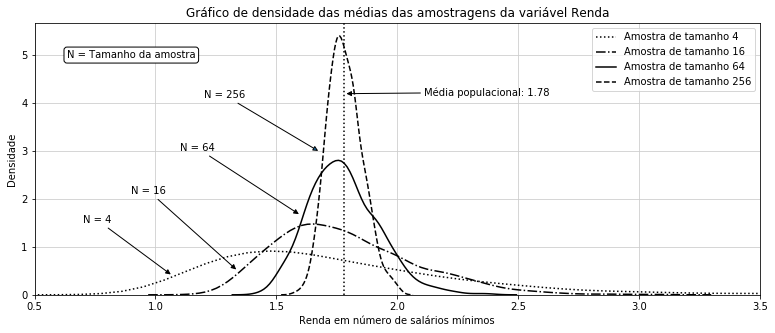

In [9]:
fig, ax = plt.subplots(figsize=(13,5))

sns.kdeplot(mean4,   ax=ax, color='black', linestyle=':')
sns.kdeplot(mean16,  ax=ax, color='black', linestyle='-.')
sns.kdeplot(mean64,  ax=ax, color='black', linestyle='-')
sns.kdeplot(mean256, ax=ax, color='black', linestyle='--')


ax.set(title="Gráfico de densidade das médias das amostragens da variável Renda", xlabel="Renda em número de salários mínimos", ylabel="Densidade")
ax.annotate('N = 4',   xy=(1.07, 0.40), xytext=(0.7, 1.5), arrowprops=dict(arrowstyle='-|>', fc='black'))
ax.annotate('N = 16',  xy=(1.34, 0.50), xytext=(0.9, 2.1), arrowprops=dict(arrowstyle='-|>', fc='black'))
ax.annotate('N = 64',  xy=(1.60, 1.66), xytext=(1.1, 3.0), arrowprops=dict(arrowstyle='-|>', fc='black'))
ax.annotate('N = 256', xy=(1.68, 2.98), xytext=(1.2, 4.1), arrowprops=dict(arrowstyle='-|>'))

ax.legend(handles=ax.lines, labels=["Amostra de tamanho 4","Amostra de tamanho 16","Amostra de tamanho 64","Amostra de tamanho 256"])

ax.grid(color=default_grid_color)
ax.set_xbound((0.5,3.5))

# Insere linnha de média populacional
ax.axvline(x=df["Renda"].mean(), color='black', linestyle=':')

# Insere anotação sobre a linha de média
ax.annotate('Média populacional: {:0.2f}'.format(df["Renda"].mean()), xy=(df["Renda"].mean(), 0.74), xytext=(80, -2),
    xycoords=('data', 'axes fraction'), textcoords='offset points',
    arrowprops=dict(arrowstyle='-|>', fc='black'))

# Insere informação adicional
ax.text(0.9, 5, "N = Tamanho da amostra", va="center", ha="center",
        bbox=dict(boxstyle="round", alpha=1, fc='white'))

# Salva figura na pasta dedicada
plt.savefig('Figuras\Q1c.png', bbox_inches='tight', dpi=dpi)

### 1.d) Obtenha os intervalos de 95% de confiança para as 1000 amostras de cada tamanho. Construa gráficos apropriados para mostrá-los. Analisando os gráficos, o que você pode concluir sobre a precisão dos intervalos à medida que aumenta o tamanho de amostra? JUSTIFIQUE.

Para 95% de confiança, zc = 1.96. Pelo teorema do limite central, para tamanhos de amostras superiores a 30 a distribuição das médias tende a ser normal. O nivel de conficanca c é o intervalo entre -zc e +zc. A area que sobra é de 1 - c, portanto, cada cauda tem area (1 - c)/2. A margem de erro é E = (zc * sd)/sqrt(n)

In [10]:
zc = 1.96
error4_95 = zc * np.std(mean4) / math.sqrt(4)
error16_95 = zc * np.std(mean16) / math.sqrt(16)
error64_95 = zc * np.std(mean64) / math.sqrt(64)
error256_95 = zc * np.std(mean256) / math.sqrt(256)
interval4_95 = (np.mean(mean4) - error4_95, np.mean(mean4), np.mean(mean4) + error4_95)
interval16_95 = (np.mean(mean16) - error16_95, np.mean(mean16), np.mean(mean16) + error16_95)
interval64_95 = (np.mean(mean64) - error64_95, np.mean(mean64), np.mean(mean64) + error64_95)
interval256_95 = (np.mean(mean256) - error256_95, np.mean(mean256), np.mean(mean256) + error256_95)
intervals_95=(interval4_95, interval16_95, interval64_95, interval256_95)

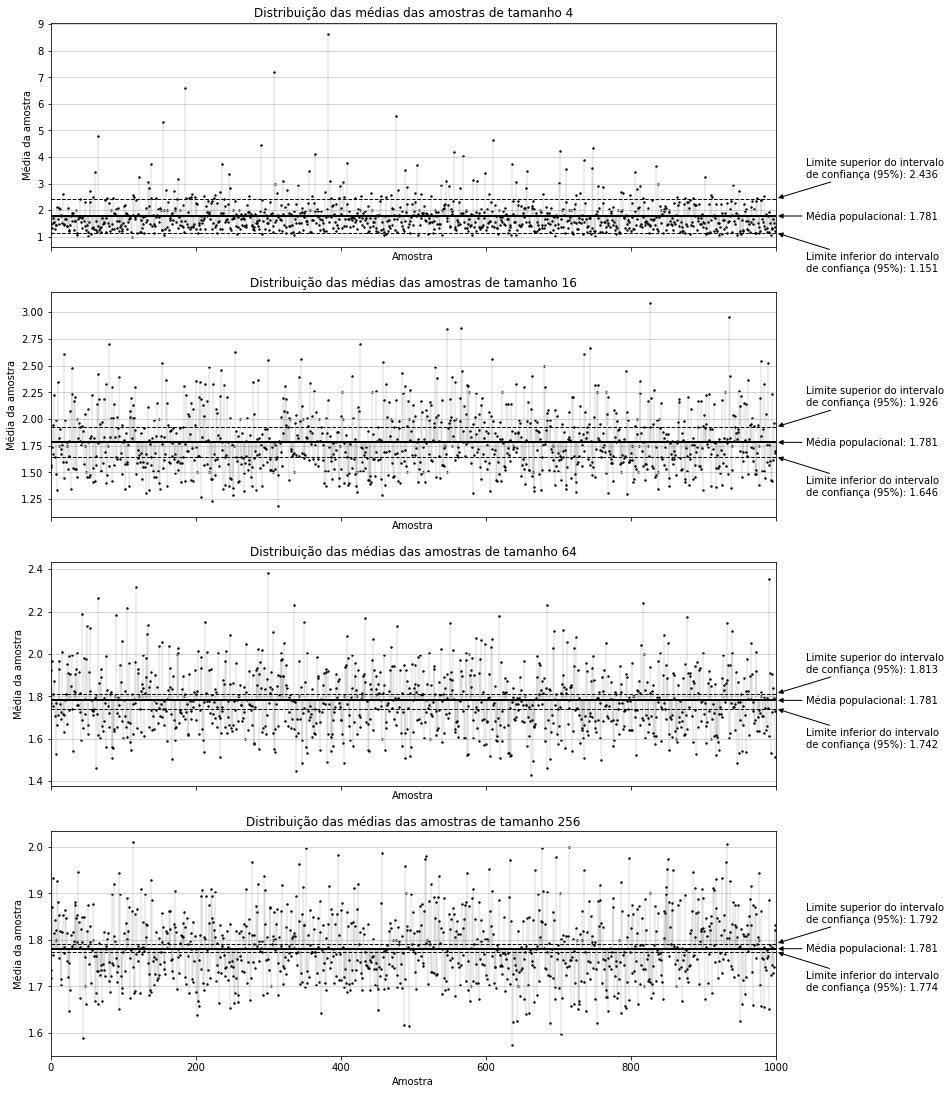

In [11]:
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(13, 19))

data = (mean4, mean16, mean64, mean256)

for i in range(0,4):
    ax[i].vlines(x=range(0,1000), ymin=df["Renda"].mean(), ymax=data[i], alpha=0.4, lw=0.4)
    ax[i].scatter(range(0,1000), data[i], s=2, color='black')

    ax[i].grid(axis="y", color=default_grid_color)
    ax[i].set_xbound((0,1000))
    ax[i].set(title="Distribuição das médias das amostras de tamanho" + " " + str(4**(1+i)), xlabel="Amostra", ylabel="Média da amostra")

    # Insere linnha de média populacional e limites de confiança
    ax[i].axhline(y=df["Renda"].mean(), color='black', linestyle='-', lw=2)
    ax[i].axhline(y=intervals_95[i][0], color='black', linestyle='--', lw=1)
    ax[i].axhline(y=intervals_95[i][2], color='black', linestyle='--', lw=1)

    # Insere anotação sobre a linha de média
    ax[i].annotate('Média populacional: {:0.3f}'.format(df["Renda"].mean()), xy=(1000, df["Renda"].mean()), xytext=(30, 0),
        verticalalignment='center', xycoords=('data', 'data'), textcoords='offset points',
        arrowprops=dict(arrowstyle='-|>', fc='black'))

    # Insere anotação sobre a linha
    ax[i].annotate('Limite inferior do intervalo\nde confiança (95%): {:0.3f}'.format(intervals_95[i][0]), xy=(1000, intervals_95[i][0]), xytext=(30, -30),
        verticalalignment='center', xycoords=('data', 'data'), textcoords='offset points',
        arrowprops=dict(arrowstyle='-|>', fc='black'))

    # Insere anotação sobre a linha
    ax[i].annotate('Limite superior do intervalo\nde confiança (95%): {:0.3f}'.format(intervals_95[i][2]), xy=(1000, intervals_95[i][2]), xytext=(30, 30),
        verticalalignment='center', xycoords=('data', 'data'), textcoords='offset points',
        arrowprops=dict(arrowstyle='-|>', fc='black'))

# Salva figura na pasta dedicada
plt.savefig('Figuras\Q1d.png', bbox_inches='tight', dpi=dpi)